<a href="https://colab.research.google.com/github/vedanthamramaysree/Model_Demo_Assignment2/blob/vedanthamramaysree-patch-1/huggingface_dataset_yahooanswers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis on any dataset in the huggingface datasets (https://huggingface.co/datasets/yahoo_answers_topics). 

In [2]:
#installing libraries
!pip install transformers sentencepiece datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#loading datasets
from datasets import load_dataset

ds = load_dataset("yahoo_answers_topics", split='train')

In [4]:
#replacing column names for better understanding
ds = ds.rename_column("question_title", "question")
ds = ds.rename_column("best_answer", "answer")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'topic', 'question', 'question_content', 'answer'],
        num_rows: 1120000
    })
    test: Dataset({
        features: ['id', 'topic', 'question', 'question_content', 'answer'],
        num_rows: 280000
    })
})

In [5]:
import pandas as pd

#dataframes for train and test data

df_train = pd.DataFrame( ds['train'] )
df_test = pd.DataFrame( ds['test'] )

**TRAIN DATA**

In [6]:
#sample train data
df_train.head()

,id,topic,question,question_content,answer
0,1046477,5,How do I see about getting a late season deer ...,"My dad forgot to get a shotgun season permit, ...",Deadline is TOMORROW 11-9. dnrstateil.us cli...
1,669189,0,Can you give me the attributes of God?,I have always wondered what others believe abo...,His attributes are found in His names...\n\nEl...
2,1117810,0,How could we make our earth more happier?,,Smile and be kind to one another...
3,260962,0,What was the best thing about being a teen in ...,,being a carefree teen
4,147517,9,Is Iranians really terrorist?,,they are uneducated so they can be brainwashed...


In [7]:
#Basic information

df_train.info()

#Describe the data

df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120000 entries, 0 to 1119999
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1120000 non-null  int64 
 1   topic             1120000 non-null  int64 
 2   question          1120000 non-null  object
 3   question_content  1120000 non-null  object
 4   answer            1120000 non-null  object
dtypes: int64(2), object(3)
memory usage: 42.7+ MB


,id,topic
count,1.120000e+06,1.120000e+06
mean,6.999116e+05,4.499818e+00
std,4.041840e+05,2.871777e+00
min,0.000000e+00,0.000000e+00
25%,3.496768e+05,2.000000e+00
50%,6.998845e+05,5.000000e+00
75%,1.049953e+06,7.000000e+00
max,1.399999e+06,9.000000e+00


In [8]:
#Find the duplicates

df_train.duplicated().sum()

0

In [17]:
#find the unique values
df_train.nunique()

id                  1120000
topic                    10
question            1095808
question_content     603074
answer              1074710
dtype: int64

In [16]:
#unique values for question sample

df_train['question'].unique()

array(['Gerrie Coetzee vs. Gerry Cooney, who wins?',
       'Why are navy seals so called ?',
       'i would to work at home using my computer. Is there a company that offers this for free enrollment?',
       ...,
       'Why do women of some races get more plastic surgery then others?',
       'Why do people think that if they repeatedly press a crosswalk button, it makes it turn faster?',
       'Umm... is there anything you can do about broken toes?'],
      dtype=object)

In [18]:
#group unique values for topics include sports, business & finance, society & culture, science & mathematics, family & relationships, computers & the internet, and more. 
df_train.groupby('topic')['question'].nunique()

topic
0    110496
1    109448
2    110541
3    110351
4    110873
5    110377
6    111118
7    110298
8    108499
9    110701
Name: question, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


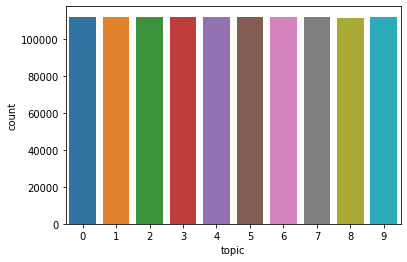

In [16]:
import seaborn as sns
#Plot the unique values of topics classes 

sns.countplot(df_train['topic'])

In [19]:
#Find null values

df_train.isnull().sum()

id                  0
topic               0
question            0
question_content    0
answer              0
dtype: int64

In [20]:
#find Datatypes

df_train.dtypes

id                   int64
topic                int64
question            object
question_content    object
answer              object
dtype: object

In [21]:
#Filter data based on a topic. Sample data for Science and Mathematics

df_train[df_train['topic']==1].head()

,id,topic,question,question_content,answer
15,657092,1,What's the sequence of the circulatory system?,,Unoxygenated Blood goes from the heart to the ...
16,469128,1,will we be able to eat fresh naturally grown v...,,Yes indeed of course we will. In fact growing...
32,941616,1,what is the different between rise and arise?,,"First, ARISE. The situation may arise where we..."
37,383250,1,Aliens? Whatcha think??,,"Definitely. What are the odds that, among all ..."
44,447782,1,why is the anode of the phototube shielded fro...,,It is not always the case.


In [24]:
#Correlation 

df_train.corr()

,id,topic
id,1.000000,-0.012495
topic,-0.012495,1.000000


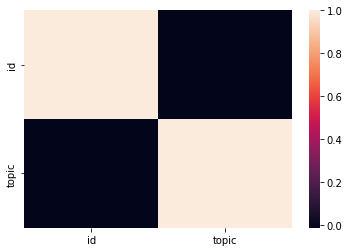

In [23]:
#Correlation plot

sns.heatmap(df_train.corr())

**TEST DATA**

In [25]:
#test data 
df_test.head()

,id,topic,question,question_content,answer
0,1232483,0,Anyone Russian here??? Or if you are not Russi...,Just tell me honestly what you think about Rus...,"Russians are people, just like everyone else. ..."
1,630594,0,Why do mormons keep coming?,"I once opened the door, and let in my house(tr...",I sincerly doubt that someone has had a set of...
2,897044,3,should teachers have to take test every 3 year...,students have to test every year just to go on...,
3,887103,7,how do you like the tv season so far? and wha...,for me i think lost and other shows which are ...,I like the way '24' does their season. they s...
4,476987,8,Why do girls get pierced down there?,"She wants me to go wit her, when she does. (Fr...","I don't personally have it done, but one of my..."


In [26]:
#Basic information

df_test.info()

#Describe the data

df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                280000 non-null  int64 
 1   topic             280000 non-null  int64 
 2   question          280000 non-null  object
 3   question_content  280000 non-null  object
 4   answer            280000 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


,id,topic
count,2.800000e+05,280000.000000
mean,7.003513e+05,4.500729
std,4.039910e+05,2.874306
min,2.000000e+00,0.000000
25%,3.512608e+05,2.000000
50%,7.004695e+05,4.000000
75%,1.050206e+06,7.000000
max,1.399996e+06,9.000000


In [27]:
#Find the duplicates

df_test.duplicated().sum()

0

In [28]:
#find the unique values
df_test.nunique()

id                  280000
topic                   10
question            277219
question_content    152497
answer              270913
dtype: int64

In [29]:
#unique values for question sample

df_test['question'].unique()

array(['Anyone Russian here??? Or if you are not Russian what do you think of Russians?',
       'Why do mormons keep coming?',
       'should teachers have to take test every 3 years in order to keep up with the change in education?',
       ..., 'A few chemistry questions?',
       'Do you always have to be honest with ur partner at all times?',
       'what materials of latest puma soccer boots?'], dtype=object)

In [30]:
#group unique values for topics include sports, business & finance, society & culture, science & mathematics, family & relationships, computers & the internet, and more. 
df_test.groupby('topic')['question'].nunique()

topic
0    27965
1    27712
2    27701
3    27847
4    27937
5    27900
6    27727
7    27652
8    27795
9    27900
Name: question, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


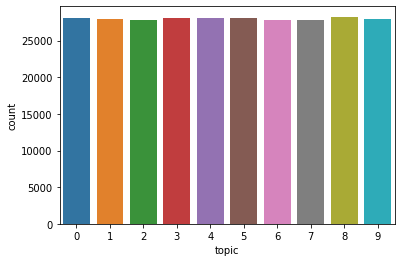

In [31]:
import seaborn as sns
#Plot the unique values

sns.countplot(df_test['topic'])

In [32]:
#Find null values

df_test.isnull().sum()

id                  0
topic               0
question            0
question_content    0
answer              0
dtype: int64

In [33]:
#Datatypes

df_test.dtypes

id                   int64
topic                int64
question            object
question_content    object
answer              object
dtype: object

In [34]:
#Filter data

df_test[df_test['topic']==1].head()

,id,topic,question,question_content,answer
6,896623,1,Anyone who knows about Descartes' Method??? Fi...,please help me with Descartes' Method!!!! thx~...,Try Google or Yahoo. You'll find worked examp...
18,1072382,1,Prove this restriction?,prove that\na^(n)+b^(n) can never be expressed...,"Let a = 3, b - 5, and n = 3. Then a^n + b^n =..."
24,1013049,1,what are the corrosion types?,,A few types of corrosion are:\n1) PITTING: Pit...
29,826411,1,urgent chem help?,"For the following reaction at 600. K, the equi...",The reaction in question is:\n\nPCl5(g) <-> PC...
47,679841,1,Why there is change in colour of cloth after i...,,When light falls onto an object a part of the ...


In [35]:
#Correlation 

df_test.corr()

,id,topic
id,1.000000,-0.011698
topic,-0.011698,1.000000


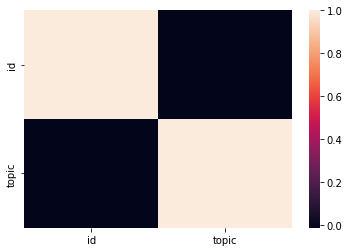

In [36]:
#Correlation plot

sns.heatmap(df_test.corr())